In [42]:
from __future__ import division
import imp
import uproot
import matplotlib
#matplotlib.use('agg')
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np
import pandas as pd
import os
import ROOT
import time
import math
from array import array
import collections

inputdir = '/home/tmettler/Desktop/v08_00_00_33/V08_00_00_35/weighted/'
outputdir = inputdir+'xsec_playground/' 
output_filedir = '/home/tmettler/Desktop/v08_00_00_33/V08_00_00_35/weighted/xsec_cross_check/'
input_filedir = '/home/tmettler/Desktop/v08_00_00_33/V08_00_00_35/weighted/'
lib_function_dir = '/home/tmettler/Desktop/uBoone/do_plots/'

plot_systematic = 0

# helper functions
globale = imp.load_source('globale',lib_function_dir+'globale.py')
NuCC = imp.load_source('NuCC_function',lib_function_dir+'NuCC_function.py')
NuCC_w = imp.load_source('NuCCWeight_function',lib_function_dir+'NuCCWeight_function.py')

Warning in <TCanvas::Constructor>: Deleting canvas with same name: c1
Warning in <TCanvas::Constructor>: Deleting canvas with same name: c1
Warning in <TCanvas::Constructor>: Deleting canvas with same name: c1


In [43]:
#!jupyter nbconvert --to script numuCCana_xsec_crosscheck.ipynb

In [44]:
# initialte ROOT default canvas
#ROOT.gROOT.SetBatch(ROOT.kFALSE)
ROOT.gStyle.SetOptStat(0)
ROOT.gStyle.SetOptTitle(0)
c1 = ROOT.TCanvas("c1","c1",1600,1200)
c1.SetGrid(1)
c1.SetLeftMargin(0.14)
c1.SetRightMargin(0.18)
c1.SetBottomMargin(0.14)

Warning in <TCanvas::Constructor>: Deleting canvas with same name: c1


# CRTinBNB tagger, Overlay or MC

In [45]:
# Load input files
#inputdir = '/home/thomasm/numuCC/V33/10kevents/'
outputdir_png, outputdir_root, outputdir_pdf = NuCC.prepareOutput2(outputdir)

#filename_overlay = 'NuCCana_Overlay_V18_V4.root'
filename_overlay = 'NuCCana_overlay_V26_mar18.root'
#filename_overlay = 'NuCCana_overlay_v25_weighted_all.root'
filename_data = 'NuCCana_data_V25.root'
filename_ext = 'NuCCana_ext_V25.root'
filename_dirt = 'NuCCana_dirt_V26_weight.root'
    
tree_name = 'numuCCAna'

In [46]:
#Open all the trees of the four files (data, ext, dirt, overlay)

data, ext, dirt, overlay = NuCC.openTrees(inputdir, filename_data, filename_ext, filename_dirt, filename_overlay, tree_name)
NuCC.printNumberOfEntries(data,ext,dirt,overlay)

pot_overlay = NuCC.getPOT(inputdir,filename_overlay,tree_name)
pot_dirt =  NuCC.getPOT(inputdir,filename_dirt,tree_name)
#V25 files
pot_data =    7.644e+18  # best with tor875
data_trigger = 1838700.0 #2220362.0 #1854495.0 #4743794 # 1987072.0 # E1DCNT_wcut
ext_trigger =  18997529.0  #2120135 #5685315 # EXT

print 'POT: '
print 'Data:\t\t', pot_data
print 'Ext:\t\t', 0
print 'Overlay:\t', pot_overlay
print 'Dirt:\t\t', pot_dirt
print ''
sample = [data,ext,overlay,dirt]
scale = {data:1.0,ext:1.0,overlay:1.0,dirt:1.0}
name = {data:'data',ext:'ext',overlay:'overlay',dirt:'dirt'}

scale[data], scale[ext], scale[dirt], scale[overlay] = NuCC.calculateScale(data_trigger, ext_trigger, pot_data, pot_dirt, pot_overlay)

scale[dirt] = scale[dirt]
scale[overlay] = scale[overlay]
print 'Scalefactors: '
print 'Data:\t\t', scale[data]
print 'Ext:\t\t', scale[ext]
print 'Overlay:\t', scale[overlay]
print 'Dirt:\t\t', scale[dirt]


Overlay: Number of Entries:	1012051
Data: Number of Entries:	28005
Ext: Number of Entries:		222702
Dirt: Number of Entries:	40808

POT: 
Data:		7.644e+18
Ext:		0
Overlay:	1.26811760704e+21
Dirt:		1.25019694173e+20

Scalefactors: 
Data:		1.0
Ext:		0.0967862715198
Overlay:	0.0060278320856
Dirt:		0.0611423668132


In [47]:
if 1:
    filename_overlay = filename_overlay+'out4_noflux.root'
    #filename_overlay = 'NuCCana_overlay_points_1kev.rootout2.root'
    filename_data = filename_data+'out4.root'
    filename_ext = filename_ext+'out4.root'
    filename_dirt = filename_dirt+'out4.root'

    tree_name = 't_out'

    data_out, ext_out, dirt_out, overlay_out = NuCC.openTreesOut(inputdir, filename_data, filename_ext, filename_dirt, filename_overlay, tree_name)
    NuCC.printNumberOfEntries(data_out,ext_out,dirt_out,overlay_out)

    sample_out = [data_out,ext_out,overlay_out,dirt_out]
    scale_out = {data_out:1.0,ext_out:1.0,overlay_out:1.0,dirt_out:1.0}
    name_out = {data_out:'data',ext_out:'ext',overlay_out:'overlay',dirt_out:'dirt'}

    scale_out[data_out], scale_out[ext_out], scale_out[dirt_out], scale_out[overlay_out] = NuCC.calculateScale(data_trigger, ext_trigger, pot_data, pot_dirt, pot_overlay)
    scale_out[dirt_out] = scale_out[dirt_out]
    scale_out[overlay_out] = scale_out[overlay_out]

Overlay: Number of Entries:	1013969
Data: Number of Entries:	28004
Ext: Number of Entries:		222701
Dirt: Number of Entries:	40800



In [48]:
##### flux and number of tragets parameters###
flux = 1.16859e11/1.592e20 # flux per POT per cm2
print flux
flux = 7.3789785277e-10
print flux
roh_data = 1.3836 #data denisity g/cm3
roh_MC = 1.3954 # MC denisity g/cm3
mol = 39.95 # g for argon
N_A = 6.022140857e23 # molec/mol avogadro zahl
N_nucleons = 40.0
V_fid = ((254.8-10)-(-1.55+10))*((117.47-10)-(-115.53+10))*((1036.9-50)-(-0.1+10))
print 'Fiducial Volume: ', V_fid
##############################################

beam_flux = flux * pot_data
print 'Beam flux = {:.5e}'.format(beam_flux),' /cm2'
N_tot = roh_data*N_A*N_nucleons*V_fid/mol
print 'Number of target nuclei= {:.5e}'.format(N_tot),' /cm3'

7.34038944724e-10
7.3789785277e-10
Fiducial Volume:  49184671.35
Beam flux = 5.64049e+09  /cm2
Number of target nuclei= 4.10331e+31  /cm3


In [49]:
# Define signals

fidVol = '(Nu_Vx_sce>(-1.55+10) && Nu_Vx_sce<(254.8-10)) && (Nu_Vy_sce>(-115.53+10) && Nu_Vy_sce<(117.47-10)) &&(Nu_Vz_sce>(-0.1+10) && Nu_Vz_sce<(1036.9-50))'
MCfidVol = '(MCNu_Vx>(-1.55+10) && MCNu_Vx<(254.8-10)) && (MCNu_Vy>(-115.53+10) && MCNu_Vy<(117.47-10)) &&(MCNu_Vz>(-0.1+10) && MCNu_Vz<(1036.9-50))'
numu_signal = 'fidVol && MCfidVol && MCNu_CCNC==0 && MCNu_PDG==14 && MCTrackPDG==13 && MCTrackPurity>0.5' # numu CC signal definition
numu_true = 'MCfidVol && MCNu_CCNC==0 && MCNu_PDG==14' # numu CC signal definition
numu_nomu = 'fidVol && MCfidVol && MCNu_CCNC==0 && MCNu_PDG==14 && MCTrackPDG!=13 && MCTrackPurity>0.5' # not an MC muon
numu_lowpur = 'fidVol && MCfidVol && MCNu_CCNC==0 && MCNu_PDG==14 && MCTrackPurity<0.5' #low purity
numu_nc = 'fidVol && MCfidVol && MCNu_CCNC==1' # nutral current
numu_ov = 'fidVol && !MCfidVol' # out of fiducial
numu_other = 'fidVol && MCfidVol && MCNu_CCNC==0 && MCNu_PDG!=14' # e.g anti nu or nue
#signal = 'MCfidVol && MCNu_CCNC==0 && MCNu_PDG==14'
for x in sample:
    x.SetAlias('muon','(muon_candidate_key==track_key)')

energy_cut = ' && MCle_Energy>0.15'

numu_signal = numu_signal+energy_cut
numu_true = numu_true+energy_cut
numu_nomu = numu_nomu
numu_lowpur = numu_lowpur
numu_nc = numu_nc
numu_ov = numu_ov
numu_other = numu_other
 
num_fidVol = {}
for x in sample:
    x.SetAlias('fidVol',fidVol)
    x.SetAlias('MCfidVol',MCfidVol)
    x.SetAlias('numu_signal',numu_signal)
    x.SetAlias('numu_true',numu_true)
    x.SetAlias('numu_nomu',numu_nomu)
    x.SetAlias('numu_lowpur',numu_lowpur)
    x.SetAlias('numu_nc',numu_nc)
    x.SetAlias('numu_ov',numu_ov)
    x.SetAlias('numu_other',numu_other)
    num_fidVol[x] = x.GetEntries('fidVol && muon')*scale[x]
    
tot_num_fidVol = num_fidVol[ext]+num_fidVol[dirt]+num_fidVol[overlay]
overlay_signals = {'numu_signal','numu_nomu','numu_lowpur','numu_nc','numu_ov','numu_other'}

In [50]:
for x in sample_out:
    x.SetAlias('muon','(track_key == key_muon)')

num_fidVol = {}
for x in sample_out:
    x.SetAlias('fidVol',fidVol)
    x.SetAlias('MCfidVol',MCfidVol)
    x.SetAlias('numu_signal',numu_signal)
    x.SetAlias('numu_true',numu_true)
    x.SetAlias('numu_nomu',numu_nomu)
    x.SetAlias('numu_lowpur',numu_lowpur)
    x.SetAlias('numu_nc',numu_nc)
    x.SetAlias('numu_ov',numu_ov)
    x.SetAlias('numu_other',numu_other)

In [51]:
track_start_border_x = '(TrackStart_x_sce <(-1.55+5) || TrackStart_x_sce > (254.8-5))'
track_end_border_x = '(TrackEnd_x_sce <(-1.55+5) || TrackEnd_x_sce > (254.8-5))'
track_start_border_y = '(TrackStart_y_sce <(-115.53+5) || TrackStart_y_sce > (117.47-5))'
track_end_border_y = '(TrackEnd_y_sce <(-115.53+5) || TrackEnd_y_sce > (117.47-5))'
track_start_border_z = '(TrackStart_z_sce <(0.1+5) || TrackStart_z_sce > (1036.9-5))'
track_end_border_z = '(TrackEnd_z_sce <(0.1+5) || TrackEnd_z_sce > (1039.9-5))'

track_end_uncontained = '(' + track_end_border_x + ' || ' + track_end_border_y + ' || ' + track_end_border_z+ ')'

data.SetAlias("track_end_uncontained",track_end_uncontained)
ext.SetAlias("track_end_uncontained",track_end_uncontained)
overlay.SetAlias("track_end_uncontained",track_end_uncontained)
dirt.SetAlias("track_end_uncontained",track_end_uncontained)
data_out.SetAlias("track_end_uncontained",track_end_uncontained)
ext_out.SetAlias("track_end_uncontained",track_end_uncontained)
overlay_out.SetAlias("track_end_uncontained",track_end_uncontained)
dirt_out.SetAlias("track_end_uncontained",track_end_uncontained)

data.SetAlias("crt_cut","(abs(crtt0_time+(crt_trig_corr_med)/1000-4)<0.9 || crtt0_time==-1)")
ext.SetAlias("crt_cut","(abs(crtt0_time+(crt_trig_corr_med)/1000-3.57+3.195-4)<0.9 || crtt0_time==-1)")
overlay.SetAlias("crt_cut","(abs(crtt0_time-3.95)<0.9 || crtt0_time==-1)")
dirt.SetAlias("crt_cut","(abs(crtt0_time-3.95)<0.9 || crtt0_time==-1)")
data_out.SetAlias("crt_cut","(abs(crtt0_time+(crt_trig_corr_med)/1000-3.95)<0.9 || crtt0_time==-1)")
ext_out.SetAlias("crt_cut","(abs(crtt0_time+(crt_trig_corr_med)/1000-3.57+3.195-3.95)<0.9 || crtt0_time==-1)")
overlay_out.SetAlias("crt_cut","(abs(crtt0_time-3.95)<0.9 || crtt0_time==-1)")
dirt_out.SetAlias("crt_cut","(abs(crtt0_time-3.95)<0.9 || crtt0_time==-1)")

crt_tom_cut = 'nr_crthit_top==0 && crthit_vertex_zcut==0 && (track_end_uncontained==1 || nr_crthit_beam_tres==0) && crt_cut'

data.SetAlias("crt_tom_cut",crt_tom_cut)
ext.SetAlias("crt_tom_cut",crt_tom_cut)
overlay.SetAlias("crt_tom_cut",crt_tom_cut)
dirt.SetAlias("crt_tom_cut",crt_tom_cut)
data_out.SetAlias("crt_tom_cut",crt_tom_cut)
ext_out.SetAlias("crt_tom_cut",crt_tom_cut)
overlay_out.SetAlias("crt_tom_cut",crt_tom_cut)
dirt_out.SetAlias("crt_tom_cut",crt_tom_cut)

weight_name = 'EventWeight*TunedCentralValue_Genie'

In [52]:
NuCC.loadGlobal(data,ext,dirt,overlay,data_out,ext_out,dirt_out,overlay_out,scale,scale_out,tot_num_fidVol,overlay_signals,sample,sample_out, name,name_out, outputdir_png, outputdir_root,outputdir_pdf)

Warning in <TCanvas::Constructor>: Deleting canvas with same name: c1


In [53]:
def make_stacked_histo_weightV2(cut,variable,weight,title,xstart,xend,xbins,file_name,side='right'):
    #mom_bins = [ -1.00, -0.50, 0.00, 0.28, 0.47, 0.63, 0.765, 0.865, 0.935, 1.00 ]
    mom_bins = [ 0.00, 0.18, 0.30, 0.45, 0.77, 1.28, 2.50 ]
    binnum = len(mom_bins) - 1
    #initialize the 1d histograms
    weight_name = 'EventWeight*TunedCentralValue_Genie'
    h_data_func = ROOT.TH1F("h_data_func",title,xbins,xstart,xend)
    h_ext_func = ROOT.TH1F("h_ext_func",title,xbins,xstart,xend)
    h_dirt_func = ROOT.TH1F("h_dirt_func",title,xbins,xstart,xend)
    h_data_func_r = ROOT.TH1F("h_data_func_r",title,xbins,xstart,xend)
    h_ext_func_r = ROOT.TH1F("h_ext_func_r",title,xbins,xstart,xend)
    h_dirt_func_r = ROOT.TH1F("h_dirt_func_r",title,xbins,xstart,xend)
    #h_data_func = ROOT.TH1F("h_data_func",title,binnum,array('f',mom_bins))
    #h_ext_func = ROOT.TH1F("h_ext_func",title,binnum,array('f',mom_bins))
    #h_dirt_func = ROOT.TH1F("h_dirt_func",title,binnum,array('f',mom_bins))
    #h_data_func_r = ROOT.TH1F("h_data_func_r",title,binnum,array('f',mom_bins))
    #h_ext_func_r = ROOT.TH1F("h_ext_func_r",title,binnum,array('f',mom_bins))
    #h_dirt_func_r = ROOT.TH1F("h_dirt_func_r",title,binnum,array('f',mom_bins))
    overlay_signals_name = ['NC','OUTFV','#bar{#nu_{#mu}},#nu_{e}, #bar{#nu_{e}} CC','#nu_{#mu} wrong matched','#nu_{#mu} (bad matched)','#nu_{#mu} CC']
    #['#nu_{#mu} CC (stopping #mu)','#nu_{#mu} CC (other)','#nu_{e}, #bar{#nu_{e}}','#bar{#nu_{#mu}} CC','NC (other)','NC (pion)', 'NC (proton)', 'OUTFV (stopping #mu)', 'OUTFV (other)', 'Cosmic (stopping #mu)', 'Cosmic (other)']
    #overlay_signals_name = overlay_signals_name.reverse()
    overlay_signals_func = ['numu_nc','numu_ov','numu_other','numu_nomu','numu_lowpur','numu_signal']
    
    
    h_overlay_func = [] # make an array of histograms for the different interactions
    h_overlay_func_r = [] # make an array of histograms for the different interactions
    for i,x in enumerate(overlay_signals_func):
        print i, x
        #h_overlay_func[x] = ROOT.TH1F(x,title,xbins,xstart,xend)
        h_overlay_func.append(ROOT.TH1F('h_overlay_func['+str(i)+']',title,xbins,xstart,xend))
        h_overlay_func_r.append(ROOT.TH1F('h_overlay_func_r['+str(i)+']',title,xbins,xstart,xend))
        #h_overlay_func.append(ROOT.TH1F('h_overlay_func['+str(i)+']',title,binnum,array('f',mom_bins)))
        #h_overlay_func_r.append(ROOT.TH1F('h_overlay_func_r['+str(i)+']',title,binnum,array('f',mom_bins)))
    #variable = variable
    # Draw/Fill the histograms for all kind of interactions
    if variable != 'TrackMomMCS_mom':
        globale.data_out.Draw(variable+'>>h_data_func',cut,'')
        globale.ext_out.Draw(variable+'>>h_ext_func',cut,'')
        #mofify this...
        globale.dirt_out.Draw(variable+'>>h_dirt_func',weight_name+'*('+cut+')','')

        cut = cut +' && '
        for i,x in enumerate(overlay_signals_func):
            #histo = x
            globale.overlay_out.Draw(variable+'>>h_overlay_func['+str(i)+']',weight_name+'*('+cut+x+')','')
    else:
        globale.data_out.Draw(variable+'>>h_data_func',cut+' && track_end_uncontained','')
        globale.ext_out.Draw(variable+'>>h_ext_func',cut+' && track_end_uncontained','')
        globale.dirt_out.Draw(variable+'>>h_dirt_func',weight_name+'*('+cut+' && track_end_uncontained'+')','')
        
        globale.data_out.Draw('TrackMomRange_mu'+'>>h_data_func_r',cut+' && !track_end_uncontained','')
        globale.ext_out.Draw('TrackMomRange_mu'+'>>h_ext_func_r',cut+' && !track_end_uncontained','')
        globale.dirt_out.Draw('TrackMomRange_mu'+'>>h_dirt_func_r',weight_name+'*('+cut+' && !track_end_uncontained'+')','')

        cut = cut +' && '
        for i,x in enumerate(overlay_signals_func):
            #histo = x
            print i, x
            globale.overlay_out.Draw(variable+'>>h_overlay_func['+str(i)+']',weight_name+'*('+cut+x+' && track_end_uncontained'')','')
            globale.overlay_out.Draw('TrackMomRange_mu>>h_overlay_func_r['+str(i)+']',weight_name+'*('+cut+x+' && !track_end_uncontained'')','')
            h_overlay_func[i].Add(h_overlay_func_r[i])
        #h_overlay_func[x] = fill_histo(globale.overlay_out,variable,h_overlay_func[x],cut+x)
    h_data_func.Add(h_data_func_r)
    h_ext_func.Add(h_ext_func_r)
    h_dirt_func.Add(h_dirt_func_r)
    # prepare the stacked histogram
    hs = ROOT.THStack("hs","");
    h_ext_func.SetFillColor(2)
    h_ext_func.SetLineColor(1)
    h_dirt_func.SetFillColor(42)
    h_dirt_func.SetLineColor(1)
    h_data_func.SetLineWidth(1)
    #scale the histograms
    h_data_func.Sumw2()	
    h_data_func.Scale(globale.scale[globale.data])
    h_ext_func.Sumw2()	
    h_ext_func.Scale(globale.scale[globale.ext])
    h_dirt_func.Sumw2()	
    h_dirt_func.Scale(globale.scale[globale.dirt])
    #fill the stacked histogram
    hs.Add(h_ext_func)
    hs.Add(h_dirt_func)
    mc_events = 0
    mc_event_list = {}
    for i,x in enumerate(overlay_signals_func):
        #h_overlay_func[x].Sumw2()
        h_overlay_func[i].Scale(globale.scale[globale.overlay])
        #h_overlay_func[x].SetFillColor((2*i+31))
        #h_overlay_func[x].SetLineColor((2*i+31))
        h_overlay_func[i].SetLineColor(1)
        mc_event_list[x] = h_overlay_func[i].GetSumOfWeights()
        mc_events = mc_events+mc_event_list[x]
        hs.Add(h_overlay_func[i])
    # calculate the data - MC ratio
    data_events = h_data_func.GetEntries()*globale.scale[globale.data]
    ext_events = h_ext_func.GetEntries()*globale.scale[globale.ext]
    dirt_events = h_dirt_func.GetSumOfWeights()
    mc_events = mc_events + dirt_events
    normalization = (data_events)/(mc_events+ext_events)
    print 'Normalization (data)/(mc +ext) = ', normalization
    if side == 'left':
        legend = ROOT.TLegend(0.1,0.65,0.6,0.9) # LEGEND LEFT
    else:
        legend = ROOT.TLegend(0.4,0.65,0.9,0.9); #LEGEND RIGHT
    legend.SetNColumns(2)
    data_name = 'Data: {0:0.1f}'.format(data_events)
    ext_name = 'Cosmic: {0:0.1f}'.format(ext_events)
    dirt_name = 'Dirt: {0:0.1f}'.format(dirt_events)
    #overlay_signals_func = ['numu_nc','numu_ov','numu_other','numu_nomu','numu_lowpur','numu_signal']
    h_overlay_func[3].SetFillColor(ROOT.kGray+3)
    h_overlay_func[3].SetLineColor(ROOT.kGray+3)
    h_overlay_func[4].SetFillColor(ROOT.kGray+2)
    h_overlay_func[4].SetLineColor(ROOT.kGray+2)
    h_overlay_func[0].SetFillColor(ROOT.kOrange)
    h_overlay_func[0].SetLineColor(ROOT.kOrange)
    h_overlay_func[1].SetFillColor(ROOT.kBlue)
    h_overlay_func[1].SetLineColor(ROOT.kBlue)
    h_overlay_func[2].SetFillColor(ROOT.kGreen)
    h_overlay_func[2].SetLineColor(ROOT.kGreen)
    h_overlay_func[5].SetFillColor(ROOT.kGray)
    h_overlay_func[5].SetLineColor(ROOT.kGray)

    '''h_overlay_func['numu_nomu'].SetFillColor(ROOT.kGray+3)
    h_overlay_func['numu_nomu'].SetLineColor(ROOT.kGray+3)
    h_overlay_func['numu_lowpur'].SetFillColor(ROOT.kGray+2)
    h_overlay_func['numu_lowpur'].SetLineColor(ROOT.kGray+2)
    h_overlay_func['numu_nc'].SetFillColor(ROOT.kOrange)
    h_overlay_func['numu_nc'].SetLineColor(ROOT.kOrange)
    h_overlay_func['numu_ov'].SetFillColor(ROOT.kBlue)
    h_overlay_func['numu_ov'].SetLineColor(ROOT.kBlue)
    h_overlay_func['numu_other'].SetFillColor(ROOT.kGreen)
    h_overlay_func['numu_other'].SetLineColor(ROOT.kGreen)
    h_overlay_func['numu_signal'].SetFillColor(ROOT.kGray)
    h_overlay_func['numu_signal'].SetLineColor(ROOT.kGray)'''
    
        
    legend.AddEntry(h_data_func,data_name,"lep");
    legend.AddEntry(h_ext_func,ext_name,"f");
    legend.AddEntry(h_dirt_func,dirt_name,"f");
    for i,x in enumerate(overlay_signals_func):
        ov_name = overlay_signals_name[i]+': {0:0.1f}'.format(mc_event_list[x])
        legend.AddEntry(h_overlay_func[i],ov_name,"f");
    #prepare the canvas with thw pads
    c1 = ROOT.TCanvas("c1","c1",1600,1200)
    c1.SetGrid(1)
    c1.SetLeftMargin(0.14)
    c1.SetRightMargin(0.1)
    c1.SetBottomMargin(0.1)
    # first pad
    c1.cd()
    pad1 = ROOT.TPad('pad1','pad1',0,0.35,1,1)
    pad1.SetGrid(1)
    pad1.Draw()
    pad1.cd()
    # draw fisrt histogram with data points and stacked ext and MC
    h_data_func.SetYTitle("Entries per bin")
    h_data_func.SetMinimum(0)
    h_data_func.SetMaximum(h_data_func.GetMaximum()*1.3)
    
    h_data_func.GetYaxis().SetLabelSize(0.06);
    h_data_func.GetYaxis().SetTitleSize(0.06);
    h_data_func.GetYaxis().SetTitleOffset(0.8);
    h_data_func.GetXaxis().SetLabelOffset(999);
    h_data_func.GetXaxis().SetTitleOffset(999);
    h_data_func.GetXaxis().SetLabelSize(0);
    h_data_func.GetXaxis().SetTitleSize(0);
    pad1.SetBottomMargin(0.03);
    pad1.SetTopMargin(0.1)
    h_data_func.SetLineColor(ROOT.kBlack)
    h_data_func.SetLineWidth(4)
    ROOT.gStyle.SetEndErrorSize(5)

    h_data_func.Draw('E1')
    legend.Draw();
    hs.Draw('same hist')
    h_data_func.Draw('E1 same')
    
    prelim = ROOT.TLatex(0.9,0.93, "MicroBooNE Preliminary");
    prelim.SetTextFont(62);
    prelim.SetTextColor(ROOT.kGray+2);
    prelim.SetNDC();
    prelim.SetTextSize(1/15.);
    prelim.SetTextAlign(32);
    #prelim.SetTextSize(0.04631579);
    prelim.Draw()
    pot_latex = ROOT.TLatex(.10, .91,'Accumulated POT: '+str(pot_data)) 
    pot_latex.SetTextFont(62);
    pot_latex.SetTextColor(ROOT.kGray+2);
    pot_latex.SetNDC();
    pot_latex.SetTextSize(1/15.);
    pot_latex.SetTextAlign(10) #;//left adjusted
    pot_latex.Draw();
    
    
    # second pad
    c1.cd()
    h_data_func.GetXaxis().SetLabelOffset(0);
    h_data_func.GetXaxis().SetTitleOffset(0);
    pad2 = ROOT.TPad('pad2','pad2',0,0,1,0.35)
    pad2.SetGrid(1)
    pad2.SetTopMargin(0.04)
    pad2.SetBottomMargin(0.4)
    pad2.Draw()
    pad2.cd()
    # Draw data - MC difference
    h_tot_func = h_ext_func.Clone()
    h_div_func = h_data_func.Clone()
    h_tot_func.Add(h_dirt_func)
    for i,x in enumerate(overlay_signals_func):
        h_tot_func.Add(h_overlay_func[i])
    h_div_func.Divide(h_tot_func )
    #h_test = hs.GetHistogram().Clone()
    #h_div_func.Divide(h_test )
    h_div_func = NuCC_w.make_stacked_histo_weight_pad2(h_div_func)
    h_div_func.SetXTitle(title)
    h_div_func.GetYaxis().SetTitleSize(0.1)
    h_div_func.GetYaxis().SetTitleOffset(0.3)
    h_div_func.GetYaxis().SetLabelSize(0.07)
    h_div_func.GetXaxis().SetTitleSize(0.15)
    h_div_func.GetXaxis().SetLabelSize(0.15)
    h_div_func.GetXaxis().SetTitleOffset(1)
    
    h_div_func.Draw('E1')
    c1.Draw()
    c1.SaveAs(globale.outputdir_png+ file_name + ".png")
    c1.SaveAs(globale.outputdir_root+ file_name + ".root")
    c1.SaveAs(globale.outputdir_pdf+ file_name + ".pdf")
    
    h_data_func.Delete()
    h_ext_func.Delete()
    h_dirt_func.Delete()
    #h_overlay_func = {} # make an array of histograms for the different interactions
    for i,x in enumerate(globale.overlay_signals):
        h_overlay_func[i].Delete()
    #sel.Delete()
    return normalization


Normalization (data)/(mc +ext) =  1.01217690695


1.0121769069548958

Warning in <TH1F::Sumw2>: Sum of squares of weights structure already created
Warning in <TCanvas::Constructor>: Deleting canvas with same name: c1
Info in <TCanvas::Print>: png file /home/tmettler/Desktop/v08_00_00_33/V08_00_00_35/weighted/xsec_playground/png/TrackMom_07old_res.png has been created
Info in <TCanvas::SaveAs>: ROOT file /home/tmettler/Desktop/v08_00_00_33/V08_00_00_35/weighted/xsec_playground/root/TrackMom_07old_res.root has been created
Info in <TCanvas::Print>: pdf file /home/tmettler/Desktop/v08_00_00_33/V08_00_00_35/weighted/xsec_playground/pdf/TrackMom_07old_res.pdf has been created


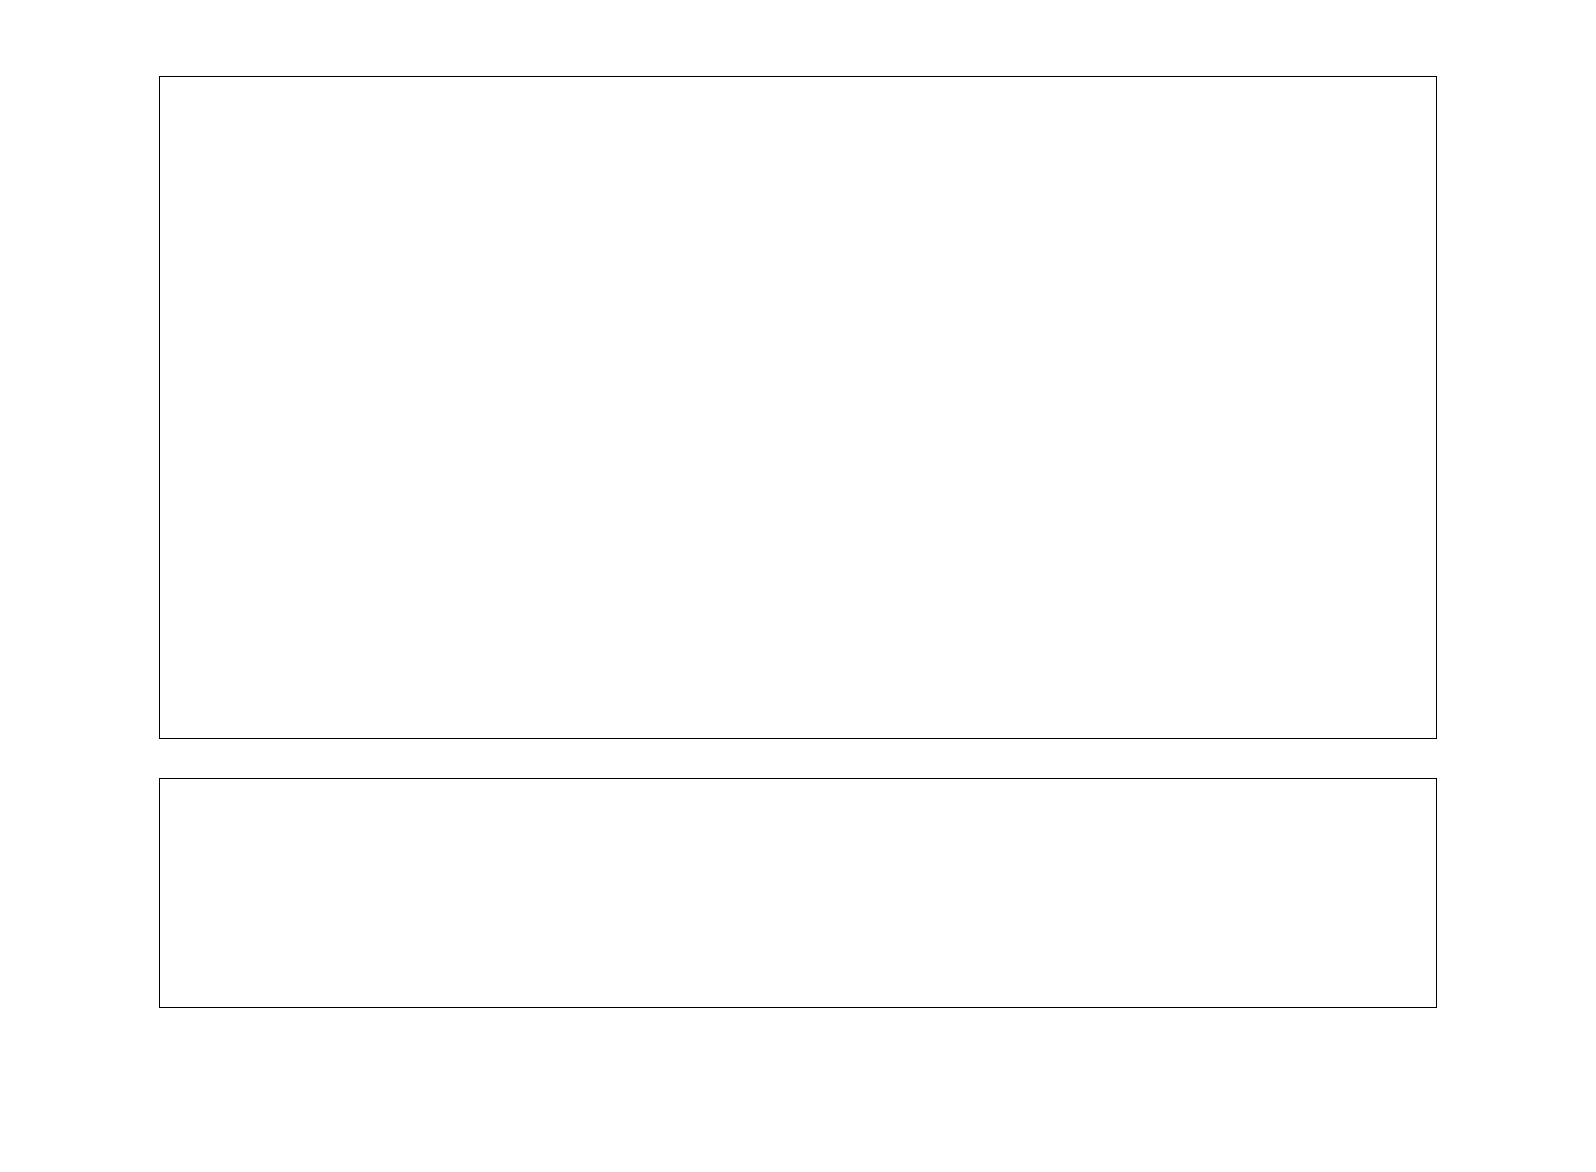

In [55]:
cut = 'fidVol && muon && TrackLength>8 && crt_tom_cut && TrackScore>0.8 && TrackLength>20 && TrackPID_chiproton>78 && NuScore>0.1'
name = '_07'
side_right = 'right'
side_left = 'left'

#NuCC_w.make_stacked_histo_weightV2(cut,'cos(TrackTheta)','EventWeight','Cos(theta)',-1,1,20,'cosTheta'+name,side_left)

#make_stacked_histo_weightV2(cut,'TrackMomMCS_mom','EventWeight','Reco. muon track momentum (MCS) [GeV]',0,2,20,'TrackMom'+name+'bin',side_right)
NuCC_w.make_stacked_histo_weightV2(cut,'TrackMomMCS_mom','EventWeight','Reco. muon track momentum (MCS) [GeV]',0,2,20,'TrackMom'+name+'old_res',side_right)


In [ ]:
# define channels definitions
kdfgklsd

#Normalization (data)/(mc +ext) =  0.999198576901

In [ ]:
numu_signal = 'fidVol && MCfidVol && MCNu_CCNC==0 && MCNu_PDG==14 && MCTrackPDG==13 && MCTrackPurity>0.5' # numu CC signal definition
numu_nomuon = 'fidVol && MCfidVol && MCNu_CCNC==0 && MCNu_PDG==14 && MCTrackPDG!=13 && MCTrackPurity>0.5' # numu CC signal definition
numu_nue = 'fidVol && MCNu_CCNC==0 && abs(MCNu_PDG)!=14 && MCTrackPurity>0.5' # e.g anti nu or nue
numu_antinu = 'fidVol && MCNu_CCNC==0 && MCNu_PDG==-14 && MCTrackPurity>0.5' # e.g anti nu or nue

numu_nc = 'fidVol && MCNu_CCNC==1 && MCTrackPurity>0.5' # nutral current
numu_ov = 'fidVol && !MCfidVol && MCTrackPurity>0.5' # out of fiducial

numu_cosmic = 'fidVol && MCTrackPurity<0.5' #low purity

#overlay_signals = ['numu_signal','numu_nue','numu_antinu','numu_nc','numu_ov','numu_cosmic']
overlay_signals = ['numu_cosmic','numu_ov','numu_nc','numu_antinu','numu_nue','numu_nomuon','numu_signal']


for x in sample_out:
    x.SetAlias('numu_signal',numu_signal)
    x.SetAlias('numu_nomuon',numu_nomuon)
    x.SetAlias('numu_nue',numu_nue)
    x.SetAlias('numu_antinu',numu_antinu)
    x.SetAlias('numu_nc',numu_nc)
    x.SetAlias('numu_ov',numu_ov)
    x.SetAlias('numu_cosmic',numu_cosmic)


In [ ]:
# Load the global variables for access of functions
NuCC.loadGlobal(data,ext,dirt,overlay,data_out,ext_out,dirt_out,overlay_out,scale,scale_out,tot_num_fidVol,overlay_signals,sample,sample_out, name,name_out, outputdir_png, outputdir_root,outputdir_pdf)
#NuCC.printGlobal()

In [ ]:
# initialte ROOT default canvas
ROOT.gStyle.SetOptStat(0)
c1 = ROOT.TCanvas("c1","c1",1600,1200)
c1.SetGrid(1)
c1.SetLeftMargin(0.14)
c1.SetRightMargin(0.1)
c1.SetBottomMargin(0.14)

In [ ]:
def make_channel_purity(cut,variable,weight,title,xstart,xend,xbins,file_name,side='right'):
    h_overlay_func = ROOT.TH1F("h_overlay_func",title,xbins,xstart,xend)
    globale.overlay_out.Draw(variable+'>>h_overlay_func',weight_name+'*('+cut+' && numu_signal)','')
    
    h_QE = ROOT.TH1F("h_QE",'h_QE',xbins,xstart,xend)
    h_MEC = ROOT.TH1F("h_MEC",'h_MEC',xbins,xstart,xend)
    h_RES = ROOT.TH1F("h_RES",'h_RES',xbins,xstart,xend)
    h_DIS = ROOT.TH1F("h_DIS",'h_DIS',xbins,xstart,xend)

    globale.overlay_out.Draw(variable+'>>h_QE',weight_name+'*('+cut+'&& numu_signal && MCNu_Interaction==0)','')
    globale.overlay_out.Draw(variable+'>>h_MEC',weight_name+'*('+cut+'&& numu_signal && MCNu_Interaction==10)','')
    globale.overlay_out.Draw(variable+'>>h_RES',weight_name+'*('+cut+'&& numu_signal && MCNu_Interaction==1)','')
    globale.overlay_out.Draw(variable+'>>h_DIS',weight_name+'*('+cut+'&& numu_signal && MCNu_Interaction==2)','')

    list_histo = [h_QE,h_MEC,h_RES,h_DIS]
    
    for x in list_histo:
        #x.Scale(globale.scale[globale.overlay])
        x.SetLineWidth(4)
    h_QE.SetLineColor(ROOT.kGreen+2)
    h_MEC.SetLineColor(ROOT.kOrange-3)
    h_RES.SetLineColor(ROOT.kRed+1)
    h_DIS.SetLineColor(ROOT.kBlue+1)
    
    h_QE.Divide(h_overlay_func)
    h_MEC.Divide(h_overlay_func)
    h_RES.Divide(h_overlay_func)
    h_DIS.Divide(h_overlay_func)
    
    if side == 'left':
        legend = ROOT.TLegend(0.15,0.30,0.5,0.9) # LEGEND LEFT
        #legend = ROOT.TLegend(0.15,0.65,0.45,0.9) # LEGEND LEFT
    else:
        #legend = ROOT.TLegend(0.6,0.65,0.9,0.9); #LEGEND RIGHT
        legend = ROOT.TLegend(0.55,0.30,0.9,0.9)
    if variable == 'TrackPID_chiproton' or variable == 'NuScore' or variable == 'TrackPhi' or variable == 'Nu_Vx_sce' or variable == 'Nu_Vy_sce' or variable == 'Nu_Vz_sce':
        legend = ROOT.TLegend(0.15,0.68,0.85,0.9) # LEGEND LEFT
        legend.SetNColumns(2)
    legend.AddEntry(h_QE,'QE',"l");
    legend.AddEntry(h_MEC,'MEC',"l");
    legend.AddEntry(h_RES,'RES',"l");
    legend.AddEntry(h_DIS,'DIS',"l");
    
    h_QE.SetYTitle("Amount of channel")
    h_QE.SetXTitle(title)    
    h_QE.GetYaxis().SetTitleSize(0.05)
    h_QE.GetYaxis().SetTitleOffset(0.0)
    h_QE.GetYaxis().SetLabelSize(0.05)
    h_QE.GetXaxis().SetTitleSize(0.05)
    h_QE.GetXaxis().SetLabelSize(0.05)
    h_QE.GetXaxis().SetTitleOffset(1)
    h_QE.SetMaximum(1)
    h_QE.SetMinimum(0)
    
    ROOT.gStyle.SetOptStat(0)
    c1 = ROOT.TCanvas("c1","c1",1600,1200)
    c1.SetGrid(1)
    c1.SetLeftMargin(0.14)
    c1.SetRightMargin(0.1)
    c1.SetBottomMargin(0.14)
    
    h_QE.Draw('hist')
    h_MEC.Draw('hist same')
    h_RES.Draw('hist same')
    h_DIS.Draw('hist same')
    
    c1.Draw()
    c1.SaveAs(globale.outputdir_png+ file_name + ".png")
    c1.SaveAs(globale.outputdir_pdf+ file_name + ".pdf")
    c1.SaveAs(globale.outputdir_root+ file_name + ".root")
    return
    

In [ ]:
cut = 'fidVol && muon && TrackLength>8 && crt_tom_cut && TrackScore>0.8 && TrackLength>20 && TrackPID_chiproton>78 && NuScore>0.1'
name = '_07'
side_right = 'right'
side_left = 'left'
#NuCC_w.make_stacked_histo_MCC8_pub(cut,'TrackMomMCS_mom*cos(TrackTheta)','EventWeight','p_{#mu}^{reco} para [GeV]',-1,2,30,'TrackMom_para'+name,side_right)
#NuCC_w.make_stacked_histo_MCC8_pub(cut,'TrackMomMCS_mom*sin(TrackTheta)','EventWeight','p_{#mu}^{reco} vert [GeV]',0,1.5,20,'TrackMom_vert'+name,side_right)

make_channel_purity(cut,'TrackMomMCS_mom*cos(TrackTheta)','EventWeight','p_{#mu}^{reco} para [GeV]',-1,2,30,'TrackMom_para_channel_pur'+name,side_right)
make_channel_purity(cut,'TrackMomMCS_mom*sin(TrackTheta)','EventWeight','p_{#mu}^{reco} vert [GeV]',0,1.5,20,'TrackMom_vert_channel_pur'+name,side_right)


In [ ]:
def make_stacked_histo_channel(cut,variable,weight,title,xstart,xend,xbins,file_name,side='right'):

    #mom_bins = [ 0.00, 0.18, 0.30, 0.45, 0.77, 1.28, 2.50 ]
    #binnum = len(mom_bins) - 1
    #initialize the 1d histograms
    #h_data_func = ROOT.TH1F("h_data_func",title,binnum,array('f',mom_bins))
    #h_ext_func = ROOT.TH1F("h_ext_func",title,binnum,array('f',mom_bins))
    #h_dirt_func = ROOT.TH1F("h_dirt_func",title,binnum,array('f',mom_bins))
    
    #weight_name = 'EventWeight*TunedCentralValue_Genie'
    h_data_func = ROOT.TH1F("h_data_func",title,xbins,xstart,xend)
    h_ext_func = ROOT.TH1F("h_ext_func",title,xbins,xstart,xend)
    h_dirt_func = ROOT.TH1F("h_dirt_func",title,xbins,xstart,xend)
    h_overlay_func = ROOT.TH1F("h_overlay_func",title,xbins,xstart,xend)
    #h_overlay_func = {} # make an array of histograms for the different interactions
    #for x in globale.overlay_signals:
    #    h_overlay_func[x] = ROOT.TH1F(x,title,xbins,xstart,xend)
    #    #h_overlay_func[x] = ROOT.TH1F(x,title,binnum,array('f',mom_bins))
    globale.data_out.Draw(variable+'>>h_data_func',cut,'')
    globale.ext_out.Draw(variable+'>>h_ext_func',cut,'')
    globale.dirt_out.Draw(variable+'>>h_dirt_func',weight_name+'*('+cut+')','')
    globale.overlay_out.Draw(variable+'>>h_overlay_func',weight_name+'*('+cut+' && !numu_signal)','')

    
    h_QE = ROOT.TH1F("h_QE",'h_QE',xbins,xstart,xend)
    h_MEC = ROOT.TH1F("h_MEC",'h_MEC',xbins,xstart,xend)
    h_RES = ROOT.TH1F("h_RES",'h_RES',xbins,xstart,xend)
    h_DIS = ROOT.TH1F("h_DIS",'h_DIS',xbins,xstart,xend)

    globale.overlay_out.Draw(variable+'>>h_QE',weight_name+'*('+cut+'&& numu_signal && MCNu_Interaction==0)','')
    globale.overlay_out.Draw(variable+'>>h_MEC',weight_name+'*('+cut+'&& numu_signal && MCNu_Interaction==10)','')
    globale.overlay_out.Draw(variable+'>>h_RES',weight_name+'*('+cut+'&& numu_signal && MCNu_Interaction==1)','')
    globale.overlay_out.Draw(variable+'>>h_DIS',weight_name+'*('+cut+'&& numu_signal && MCNu_Interaction==2)','')

    list_histo = [h_QE,h_MEC,h_RES,h_DIS]
    
    for x in list_histo:
        x.Scale(globale.scale[globale.overlay])
        #x.Divide(h_eff_tilde)
        #x.Scale(1.0/(N_tot*beam_flux*1e-38))
        x.SetLineWidth(4)
        #for i in range(1,binnum+1):
        #    x.SetBinContent(i,x.GetBinContent(i)/x.GetBinWidth(i))
        #    x.SetBinError(i,x.GetBinError(i)/x.GetBinWidth(i))

    h_QE.SetLineColor(ROOT.kGreen+2)
    h_MEC.SetLineColor(ROOT.kOrange-3)
    h_RES.SetLineColor(ROOT.kRed+1)
    h_DIS.SetLineColor(ROOT.kBlue+1)
    
    
    
    # prepare the stacked histogram
    hs = ROOT.THStack("hs","");
    h_data_func.SetLineWidth(1)
    
    h_data_func.SetMarkerStyle(ROOT.kFullCircle);
    h_data_func.SetMarkerSize(0.9);

    #scale the histograms
    h_data_func.Sumw2()
    h_data_func.Scale(globale.scale[globale.data])
    h_ext_func.Sumw2()
    h_ext_func.Scale(globale.scale[globale.ext])
    h_dirt_func.Sumw2()
    h_dirt_func.Scale(globale.scale[globale.dirt])
    h_overlay_func.Sumw2()
    h_overlay_func.Scale(globale.scale[globale.overlay])
    #fill the stacked histogram
    h_data_func.Add(h_ext_func,-1)
    h_data_func.Add(h_dirt_func,-1)
    h_data_func.Add(h_overlay_func,-1)
    
    hs.Add(h_QE)
    hs.Add(h_MEC)
    hs.Add(h_RES)
    hs.Add(h_DIS)

    #print 'Normalization (data)/(mc +ext) = ', normalization
    if side == 'left':
        legend = ROOT.TLegend(0.15,0.30,0.5,0.9) # LEGEND LEFT
        #legend = ROOT.TLegend(0.15,0.65,0.45,0.9) # LEGEND LEFT
    else:
        #legend = ROOT.TLegend(0.6,0.65,0.9,0.9); #LEGEND RIGHT
        legend = ROOT.TLegend(0.55,0.30,0.9,0.9)
    if variable == 'TrackPID_chiproton' or variable == 'NuScore' or variable == 'TrackPhi' or variable == 'Nu_Vx_sce' or variable == 'Nu_Vy_sce' or variable == 'Nu_Vz_sce':
        legend = ROOT.TLegend(0.15,0.68,0.85,0.9) # LEGEND LEFT
        legend.SetNColumns(2)
    #data_name = 'Data: {0:0.1f}'.format(data_events)
    data_name = 'Data - background'#: {0:0.1f}'.format(data_events)

    legend.AddEntry(h_QE,'QE',"l");
    legend.AddEntry(h_MEC,'MEC',"l");
    legend.AddEntry(h_RES,'RES',"l");
    legend.AddEntry(h_DIS,'DIS',"l");
    legend.AddEntry(h_data_func,data_name,"lep")
    #prepare the canvas with thw pads
    c1 = ROOT.TCanvas("c1","c1",1600,1200)
    c1.SetGrid(1)
    c1.SetLeftMargin(0.14)
    c1.SetRightMargin(0.18)
    c1.SetBottomMargin(0.14)
    # first pad
    c1.cd()
    pad1 = ROOT.TPad('pad1','pad1',0,0.35,1,1)
    pad1.SetGrid(1)
    pad1.Draw()
    pad1.cd()
    # draw fisrt histogram with data points and stacked ext and MC
    h_data_func.SetYTitle("Entries per bin")
    h_data_func.SetMinimum(0)
    if variable == 'TrackPID_chiproton' or variable == 'TrackPhi' or variable == 'Nu_Vx_sce' or variable == 'Nu_Vy_sce' or variable == 'Nu_Vz_sce':
        h_data_func.SetMaximum(h_data_func.GetMaximum()*1.5)
    else:
        h_data_func.SetMaximum(h_data_func.GetMaximum()*1.3)
    
    h_data_func.GetYaxis().SetLabelSize(0.06);
    h_data_func.GetYaxis().SetTitleSize(0.06);
    h_data_func.GetYaxis().SetTitleOffset(0.8);
    h_data_func.GetXaxis().SetLabelOffset(999);
    h_data_func.GetXaxis().SetTitleOffset(999);
    h_data_func.GetXaxis().SetLabelSize(0);
    h_data_func.GetXaxis().SetTitleSize(0);
    pad1.SetBottomMargin(0.03);
    pad1.SetTopMargin(0.1)
    h_data_func.SetLineColor(ROOT.kBlack)
    h_data_func.SetLineWidth(2)
    ROOT.gStyle.SetEndErrorSize(9)
    
    h_data_func.Draw('E1')
    legend.Draw();
    hs.Draw('same hist')
    h_data_func.Draw('E1 same')

    prelim = ROOT.TLatex(0.9,0.93, "MicroBooNE Preliminary");
    prelim.SetTextFont(62);
    prelim.SetTextColor(ROOT.kGray+2);
    prelim.SetNDC();
    prelim.SetTextSize(1/15.);
    prelim.SetTextAlign(32);
    #prelim.SetTextSize(0.04631579);
    prelim.Draw()
    pot_latex = ROOT.TLatex(.10, .91,'Accumulated POT: '+str(pot_data)) 
    pot_latex.SetTextFont(62);
    pot_latex.SetTextColor(ROOT.kGray+2);
    pot_latex.SetNDC();
    pot_latex.SetTextSize(1/15.);
    pot_latex.SetTextAlign(10) #;//left adjusted
    pot_latex.Draw();
    
    # second pad
    c1.cd()
    h_data_func.GetXaxis().SetLabelOffset(0);
    h_data_func.GetXaxis().SetTitleOffset(0);
    pad2 = ROOT.TPad('pad2','pad2',0,0,1,0.35)
    pad2.SetGrid(1)
    pad2.SetTopMargin(0.04)
    pad2.SetBottomMargin(0.4)
    pad2.Draw()
    pad2.cd()
    # Draw data - MC difference
    h_tot_func = h_QE.Clone()
    h_div_func = h_data_func.Clone()
    h_tot_func.Add(h_RES)
    h_tot_func.Add(h_MEC)
    h_tot_func.Add(h_DIS)

    h_div_func.Divide(h_tot_func )
    #h_test = hs.GetHistogram().Clone()
    #h_div_func.Divide(h_test )
    h_div_func = NuCC_w.make_stacked_histo_weight_pad2(h_div_func)
    h_div_func.SetMinimum(0)
    h_div_func.SetMaximum(2)
    h_div_func.SetXTitle(title)
    h_div_func.GetXaxis().CenterTitle()
    h_div_func.GetYaxis().SetTitleSize(0.1)
    h_div_func.GetYaxis().SetTitleOffset(0.3)
    h_div_func.GetYaxis().SetLabelSize(0.07)
    h_div_func.GetXaxis().SetTitleSize(0.15)
    h_div_func.GetXaxis().SetLabelSize(0.15)
    h_div_func.GetXaxis().SetTitleOffset(1)
    h_QE1 = h_QE.Clone()
    h_MEC1 = h_MEC.Clone()
    h_RES1 = h_RES.Clone()
    h_DIS1 = h_DIS.Clone()
    
    h_channel_all = h_QE.Clone()
    h_channel_all.Add(h_MEC)
    h_channel_all.Add(h_RES)
    h_channel_all.Add(h_DIS)
    
    h_QE1.Divide(h_channel_all)
    h_MEC1.Divide(h_channel_all)
    h_RES1.Divide(h_channel_all)
    h_DIS1.Divide(h_channel_all)
    
    h_div_func.Draw('E1')
    
    h_QE1.Draw('hist same')
    h_MEC1.Draw('hist same')
    h_RES1.Draw('hist same')
    h_DIS1.Draw('hist same')

    c1.Draw()
    c1.SaveAs(globale.outputdir_png+ file_name + ".png")
    c1.SaveAs(globale.outputdir_pdf+ file_name + ".pdf")
    c1.SaveAs(globale.outputdir_root+ file_name + ".root")
    
    h_data_func.Delete()
    h_ext_func.Delete()
    h_dirt_func.Delete()
    #h_overlay_func = {} # make an array of histograms for the different interactions
    #for x in globale.overlay_signals:
    #    h_overlay_func[x].Delete()
    #sel.Delete()
    return #normalization

In [ ]:
cut = 'fidVol && muon && TrackLength>8 && crt_tom_cut && TrackScore>0.8 && TrackLength>20 && TrackPID_chiproton>78 && NuScore>0.1'
name = '_07'
side_right = 'right'
side_left = 'left'
#NuCC_w.make_stacked_histo_MCC8_pub(cut,'TrackMomMCS_mom*cos(TrackTheta)','EventWeight','p_{#mu}^{reco} para [GeV]',-1,2,30,'TrackMom_para'+name,side_right)
#NuCC_w.make_stacked_histo_MCC8_pub(cut,'TrackMomMCS_mom*sin(TrackTheta)','EventWeight','p_{#mu}^{reco} vert [GeV]',0,1.5,20,'TrackMom_vert'+name,side_right)

make_stacked_histo_channel(cut,'TrackMomMCS_mom*cos(TrackTheta)','EventWeight','p_{#mu}^{reco} para [GeV]',-1,2,30,'TrackMom_para_channel'+name,side_right)
make_stacked_histo_channel(cut,'TrackMomMCS_mom*sin(TrackTheta)','EventWeight','p_{#mu}^{reco} vert [GeV]',0,1.5,20,'TrackMom_vert_channel'+name,side_right)

#make_stacked_histo_MCC8_pub(cut,'TrackMomMCS_mom','EventWeight','p_{#mu}^{reco} [GeV]',0,1.5,20,'TrackMom'+name+'true',side_right)
#NuCC_w.make_stacked_histo_MCC8_pub(cut,'TrackMomMCS_mom','EventWeight','p_{#mu}^{reco} [GeV]',0,1.5,20,'TrackMom'+name,side_right)
cut = 'fidVol && muon'
name = '_01'
#NuCC_w.make_stacked_histo_MCC8_pub(cut,'TrackMomMCS_mom*cos(TrackTheta)','EventWeight','p_{#mu}^{reco} para [GeV]',-1,2,30,'TrackMom_para'+name,side_right)
#NuCC_w.make_stacked_histo_MCC8_pub(cut,'TrackMomMCS_mom*sin(TrackTheta)','EventWeight','p_{#mu}^{reco} vert [GeV]',0,1.5,20,'TrackMom_vert'+name,side_right)

#make_stacked_histo_channel(cut,'TrackMomMCS_mom*cos(TrackTheta)','EventWeight','p_{#mu}^{reco} para [GeV]',-1,2,30,'TrackMom_para_channel'+name,side_right)
#make_stacked_histo_channel(cut,'TrackMomMCS_mom*sin(TrackTheta)','EventWeight','p_{#mu}^{reco} vert [GeV]',0,1.5,20,'TrackMom_vert_channel'+name,side_right)

#make_stacked_histo_MCC8_pub(cut,'TrackMomMCS_mom','EventWeight','p_{#mu}^{reco} [GeV]',0,1.5,20,'TrackMom'+name+'true',side_right)
#NuCC_w.make_stacked_histo_MCC8_pub(cut,'TrackMomMCS_mom','EventWeight','p_{#mu}^{reco} [GeV]',0,1.5,20,'TrackMom'+name,side_right)


In [ ]:
gfhdgh

In [ ]:
#cut = 'fidVol && muon && TrackLength>8'
cut = 'fidVol && muon && TrackLength>8 && nr_crthit_top==0 && (crthit_vertex_zcut==0)'
name = '_021'
side_right = 'right'
side_left = 'left'
#NuCC_w.make_stacked_histo_onoff_pub(cut,'(nr_crthit_top==0)','EventWeight','nr_crthit_top',0,2,2,'CRTTophit_cut'+name,side_left,'has CRTHit in Top','has No CRTHit in Top')
#NuCC_w.make_stacked_histo_onoff_pub(cut,'(crthit_vertex_zcut==0)','EventWeight','nr_crthit_top',0,2,2,'CRTvertex_cut'+name,side_left,'has uptream CRTHit','has No upstreamCRTHit')
#NuCC_w.make_stacked_histo_onoff_pub(cut,'(track_end_uncontained==1 || nr_crthit_beam_tres==0)','EventWeight','nr_crthit_top',0,2,2,'CRTcontVeto_cut'+name,side_left,'Veto for cont. event','No Veto')
#NuCC_w.make_stacked_histo_onoff_pub(cut,'crt_cut','EventWeight','nr_crthit_top',0,2,2,'CRTAsso_cut'+name,side_left,'has as. CRTHit off beam','has No as. CRTHit off beam')

In [ ]:
#cut = 'fidVol && muon && TrackLength>8'
cut = 'fidVol && muon && TrackLength>8 && nr_crthit_top==0 && (crthit_vertex_zcut==0) && (track_end_uncontained==1 || nr_crthit_beam_tres==0)'
name = '_022'
side_right = 'right'
side_left = 'left'
#NuCC_w.make_stacked_histo_onoff_pub(cut,'(nr_crthit_top==0)','EventWeight','nr_crthit_top',0,2,2,'CRTTophit_cut'+name,side_left,'has CRTHit in Top','has No CRTHit in Top')
#NuCC_w.make_stacked_histo_onoff_pub(cut,'(crthit_vertex_zcut==0)','EventWeight','nr_crthit_top',0,2,2,'CRTvertex_cut'+name,side_left,'has uptream CRTHit','has No upstreamCRTHit')
#NuCC_w.make_stacked_histo_onoff_pub(cut,'(track_end_uncontained==1 || nr_crthit_beam_tres==0)','EventWeight','nr_crthit_top',0,2,2,'CRTcontVeto_cut'+name,side_left,'Veto for cont. event','No Veto')
#NuCC_w.make_stacked_histo_onoff_pub(cut,'crt_cut','EventWeight','nr_crthit_top',0,2,2,'CRTAsso_cut'+name,side_left,'has as. CRTHit off beam','has No as. CRTHit off beam')

In [ ]:
cut = 'fidVol && muon && TrackLength>8 && crt_tom_cut && TrackScore>0.8 && TrackLength>20 && TrackPID_chiproton>78 && NuScore>0.1'
name = '_071'
side_right = 'right'
side_left = 'left'
#NuCC_w.make_stacked_histo_MCC8_pub(cut,'Nu_Vx_sce','EventWeight','#nu_{#mu}^{reco} vertex X position [cm]',-10,270,20,'NuVx_sce'+name,side_left)
cut = 'fidVol && muon && TrackLength>8 && crt_tom_cut && TrackScore>0.8 && TrackLength>20 && TrackPID_chiproton>78 && NuScore>0.2'
name = '_072'
side_right = 'right'
side_left = 'left'
#NuCC_w.make_stacked_histo_MCC8_pub(cut,'Nu_Vx_sce','EventWeight','#nu_{#mu}^{reco} vertex X position [cm]',-10,270,20,'NuVx_sce'+name,side_left)
cut = 'fidVol && muon && TrackLength>8 && crt_tom_cut && TrackScore>0.8 && TrackLength>20 && TrackPID_chiproton>78 && NuScore>0.3'
name = '_073'
side_right = 'right'
side_left = 'left'
#NuCC_w.make_stacked_histo_MCC8_pub(cut,'Nu_Vx_sce','EventWeight','#nu_{#mu}^{reco} vertex X position [cm]',-10,270,20,'NuVx_sce'+name,side_left)
cut = 'fidVol && muon && TrackLength>8 && crt_tom_cut && TrackScore>0.8 && TrackLength>20 && TrackPID_chiproton>78 && NuScore>0.5'
name = '_075'
side_right = 'right'
side_left = 'left'
#NuCC_w.make_stacked_histo_MCC8_pub(cut,'Nu_Vx_sce','EventWeight','#nu_{#mu}^{reco} vertex X position [cm]',-10,270,20,'NuVx_sce'+name,side_left)



#NuCC_w.make_stacked_histo_MCC8_pub(cut,'Nu_Vy_sce','EventWeight','#nu_{#mu}^{reco} vertex Y position [cm]',-120,120,20,'NuVy_sce'+name,side_left)
#NuCC_w.make_stacked_histo_MCC8_pub(cut,'Nu_Vz_sce','EventWeight','#nu_{#mu}^{reco} vertex Z position [cm]',-50,1050,20,'NuVz_sce'+name,side_left)
#NuCC_w.make_stacked_histo_MCC8_pub(cut,'TrackMomMCS_mom','EventWeight','p_{#mu}^{reco} [GeV]',0,2.5,20,'TrackMom'+name,side_right)
#NuCC_w.make_stacked_histo_MCC8_pub(cut,'cos(TrackTheta)','EventWeight','cos(#theta_{#mu}^{reco})',-1,1,20,'cosTheta'+name,side_left)
#NuCC_w.make_stacked_histo_MCC8_pub(cut,'TrackPhi','EventWeight','#phi_{#mu}^{reco}',-3.15,3.15,20,'phi'+name,side_left)

#NuCC_w.make_stacked_histo_MCC8_pub(cut,'TrackLength','EventWeight','Candidate Track Length [cm]',0,700,30,'TrackLength'+name,'right')
#NuCC_w.make_stacked_histo_MCC8_pub(cut,'TrackPID_chiproton','EventWeight','Track PID proton',0,350,20,'PIDproton'+name,side_left)
#NuCC_w.make_stacked_histo_MCC8_pub(cut,'TrackPID_chimuon','EventWeight','Track PID Chi2 muon',0,60,20,'PIDmuon'+name,'right')
#NuCC_w.make_stacked_histo_MCC8_pub(cut,'TrackPID_chipion','EventWeight','Track PID Chi2 pion',0,60,20,'PIDpion'+name,'right')
#NuCC_w.make_stacked_histo_MCC8_pub(cut+'&& TrackPID_chimuon!=-999','TrackPID_chimuon/TrackPID_chiproton','EventWeight','Track PID Chi2 muon/proton ration',0,0.25,20,'PIDmuprot_ration'+name,'right')
#NuCC_w.make_stacked_histo_MCC8_pub(cut,'TrackPID_chimuon/TrackPID_chipion','EventWeight','Track PID Chi2 muon/pion ration',0.4,1.2,20,'PIDmupion_ration'+name,'right')
#NuCC_w.make_stacked_histo_MCC8_pub(cut,'nr_crthit_top','EventWeight','Number of CRT hits in top',0,4,4,'CRTTophit'+name,'right')
#NuCC_w.make_stacked_histo_MCC8_pub(cut,'crthit_vertex_zcut','EventWeight','Number of CRT hits upstream of vertex',0,4,4,'CRTVertexcut'+name,'right')
#NuCC_w.make_stacked_histo_MCC8_pub(cut,'TrackScore','EventWeight','Track Score',0.5,1,20,'TrackScore'+name,side_left)
#NuCC_w.make_stacked_histo_MCC8_pub(cut,'NuScore','EventWeight','Topological Score',0,1,20,'NuScore'+name,'right')

#NuCC_w.make_stacked_histo_MCC8_pub(cut + ' && 1','NuTracks','EventWeight','Track Multiplicity',0,10,10,'NuTracks'+name,side_right)
#NuCC_w.make_stacked_histo_MCC8_pub(cut + ' && 1','NumPfp','EventWeight','Particle Multiplicity',0,10,10,'NumPfp'+name,side_right)

In [ ]:
weight_name = 'EventWeight*TunedCentralValue_Genie'
cut = 'fidVol && muon && TrackLength>8 && crt_tom_cut && TrackScore>0.8 && TrackLength>20 && TrackPID_chiproton>78 && NuScore>0.1'
name = '_07'
side_right = 'right'
side_left = 'left'
print make_stacked_histo_MCC8_pub(cut,'cos(TrackTheta)','EventWeight','Cos(theta)',-1,1,20,'cosTheta'+name,side_left)
cut = 'fidVol && muon && TrackLength>8 && crt_tom_cut && TrackScore>0.8'
name = '_04'
print make_stacked_histo_MCC8_pub(cut,'cos(TrackTheta)','EventWeight','Cos(theta)',-1,1,20,'cosTheta'+name,side_left)
cut = 'fidVol && muon'
name = '_01'
print make_stacked_histo_MCC8_pub(cut,'cos(TrackTheta)','EventWeight','Cos(theta)',-1,1,20,'cosTheta'+name,side_left)


In [ ]:
weight_name = 'EventWeight'
cut = 'fidVol && muon && TrackLength>8 && crt_tom_cut && TrackScore>0.8 && TrackLength>20 && TrackPID_chiproton>78 && NuScore>0.1'
name = '_07_notune'
side_right = 'right'
side_left = 'left'
print make_stacked_histo_MCC8_pub(cut,'cos(TrackTheta)','EventWeight','Cos(theta)',-1,1,20,'cosTheta'+name,side_left)
cut = 'fidVol && muon && TrackLength>8 && crt_tom_cut && TrackScore>0.8'
name = '_04_notune'
print make_stacked_histo_MCC8_pub(cut,'cos(TrackTheta)','EventWeight','Cos(theta)',-1,1,20,'cosTheta'+name,side_left)
cut = 'fidVol && muon'
name = '_01_notune'
print make_stacked_histo_MCC8_pub(cut,'cos(TrackTheta)','EventWeight','Cos(theta)',-1,1,20,'cosTheta'+name,side_left)


In [ ]:
cut = 'fidVol && muon'
name = '_01'
side_right = 'right'
side_left = 'left'
#NuCC_w.make_stacked_histo_MCC8_pub(cut,'Nu_Vx_sce','EventWeight','Reco. Nu vertex X position [cm]',-10,270,20,'NuVx_sce'+name,side_left)
#NuCC_w.make_stacked_histo_MCC8_pub(cut,'Nu_Vy_sce','EventWeight','Reco. Nu vertex Y position [cm]',-120,120,20,'NuVy_sce'+name,side_left)
#NuCC_w.make_stacked_histo_MCC8_pub(cut,'Nu_Vz_sce','EventWeight','Reco. Nu vertex Z position [cm]',-50,1050,20,'NuVz_sce'+name,side_left)
'''NuCC_w.make_stacked_histo_MCC8_pub(cut,'TrackMomMCS_mom','EventWeight','Reco. muon track momentum (MCS) [GeV]',0,1.5,20,'TrackMom'+name,side_right)
NuCC_w.make_stacked_histo_MCC8_pub(cut,'cos(TrackTheta)','EventWeight','Cos(theta)',-1,1,20,'cosTheta'+name,side_left)
NuCC_w.make_stacked_histo_MCC8_pub(cut,'TrackPhi','EventWeight','Reco. muon phi',-3.15,3.15,20,'phi'+name,side_left)
'''
#NuCC_w.make_stacked_histo_MCC8_pub(cut,'TrackLength','EventWeight','muon track length [cm]',0,600,30,'TrackLength'+name,'right')
'''NuCC_w.make_stacked_histo_MCC8_pub(cut,'TrackPID_chiproton','EventWeight','Track PID Chi2 proton',0,350,20,'PIDproton'+name,side_left)
NuCC_w.make_stacked_histo_MCC8_pub(cut,'TrackPID_chimuon','EventWeight','Track PID Chi2 muon',0,60,20,'PIDmuon'+name,'right')
NuCC_w.make_stacked_histo_MCC8_pub(cut,'TrackPID_chipion','EventWeight','Track PID Chi2 pion',0,60,20,'PIDpion'+name,'right')
NuCC_w.make_stacked_histo_MCC8_pub(cut+'&& TrackPID_chimuon!=-999','TrackPID_chimuon/TrackPID_chiproton','EventWeight','Track PID Chi2 muon/proton ration',0,0.25,20,'PIDmuprot_ration'+name,'right')
NuCC_w.make_stacked_histo_MCC8_pub(cut,'TrackPID_chimuon/TrackPID_chipion','EventWeight','Track PID Chi2 muon/pion ration',0.4,1.2,20,'PIDmupion_ration'+name,'right')
NuCC_w.make_stacked_histo_MCC8_pub(cut,'nr_crthit_top','EventWeight','Number of CRT hits in top',0,4,4,'CRTTophit'+name,'right')
NuCC_w.make_stacked_histo_MCC8_pub(cut,'crthit_vertex_zcut','EventWeight','Number of CRT hits upstream of vertex',0,4,4,'CRTVertexcut'+name,'right')
NuCC_w.make_stacked_histo_MCC8_pub(cut,'TrackScore','EventWeight','TrackScore',0.5,1,20,'TrackScore'+name,side_left)
NuCC_w.make_stacked_histo_MCC8_pub(cut,'NuScore','EventWeight','Topological score',0,1,20,'NuScore'+name,'right')
NuCC_w.make_stacked_histo_MCC8_pub(cut + ' && 1','NuTracks','EventWeight','Number of Tracks',0,10,10,'NuTracks'+name,side_right)
NuCC_w.make_stacked_histo_MCC8_pub(cut + ' && 1','NumPfp','EventWeight','Number of Pfparticle',0,10,10,'NumPfp'+name,side_right)'''

In [ ]:
# check efficiency for nue
cut = 'fidVol && muon && TrackLength>8 && crt_tom_cut && TrackScore>0.8 && TrackLength>20 && TrackPID_chiproton>78 && NuScore>0.1'

xstart = -2
xend = 2.5
xbin = 100
weight_name = 'EventWeight*TunedCentralValue_Genie'
title = 'true moum momentum efficiency'
nenner_cut = ' MCNu_PDG==12'
zahler_cut = 'fidVol && muon && crt_tom_cut && TrackScore>0.8\
                && TrackLength>20 && TrackPID_chiproton>78 && NuScore>0.1 && MCNu_PDG==12'
h_init_eff_energy = ROOT.TH1F("h_init_eff_energy",title,xbin,xstart,xend)
h_init_eff_energy_1 = ROOT.TH1F("h_init_eff_energy_1",title,xbin,xstart,xend)
#h_init_eff_energy = fill_histo(globale.overlay_out,'MCNu_Energy',h_init_eff_energy,zahler_cut)
#h_init_eff_energy_1 = fill_histo(globale.overlay_out,'MCNu_Energy',h_init_eff_energy_1,nenner_cut)
globale.overlay_out.Draw('MCle_Energy>>h_init_eff_energy',weight_name+'*('+zahler_cut+')')
globale.overlay_out.Draw('MCle_Energy>>h_init_eff_energy_1',weight_name+'*('+nenner_cut+')')
print 'Number of passing electron neutrinos: ',h_init_eff_energy.GetSumOfWeights()
print 'Number of electron neutrinos in fidVol: ', h_init_eff_energy_1.GetSumOfWeights()

print 'Number of passing electron neutrinos: ',h_init_eff_energy.GetSumOfWeights()/pot_overlay*13.2e20
print 'Number of electron neutrinos in fidVol: ', h_init_eff_energy_1.GetSumOfWeights()/pot_overlay*13.2e20
eff =  ROOT.TEfficiency(h_init_eff_energy,h_init_eff_energy_1)
eff.SetStatisticOption(ROOT.TEfficiency.kFCP)#;  // to set option for errors (see ref doc)
eff.SetConfidenceLevel(0.68)
eff.SetTitle(title)
eff.Draw("AP")
ROOT.gPad.Update()
graph = eff.GetPaintedGraph()
graph.SetMinimum(0)
graph.SetMaximum(1)
graph.SetLineWidth(2)
graph.GetXaxis().SetTitle("Truth muon momentum [GeV]")
graph.GetYaxis().SetTitle("Signal efficiency")
graph.GetYaxis().SetTitleSize(0.05)
graph.GetYaxis().SetTitleOffset(0.0)
graph.GetYaxis().SetLabelSize(0.05)
graph.GetXaxis().SetTitleSize(0.05)
graph.GetXaxis().SetLabelSize(0.05)
graph.GetXaxis().SetTitleOffset(1)
graph.SetLineColor(ROOT.kBlack)
graph.SetLineWidth(4)
ROOT.gStyle.SetEndErrorSize(5)
graph.Draw("AP")
#prelim = draw_sim()
#prelim.Draw()
h_init_eff_energy.Draw()

c1.Draw()
c1.SaveAs(globale.outputdir_png + "h_eff_electron.png")
c1.SaveAs(globale.outputdir_root + "h_eff_electron.root")
c1.SaveAs(globale.outputdir_pdf + "h_eff_electron.pdf")

eff.Write("h_eff_true")